<a href="https://colab.research.google.com/github/creanero/photon_counter/blob/main/deepak_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Monte Carlo Simulaitions of Differential Photometry

Step1: Build a program for the blackbody spectral energy density.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def blackbody_spectrum(wavelengths, temperature):
    # Constants
    h = 6.62607015e-34
    c = 2.99792458e8
    k = 1.38064852e-23

    wavelengths = wavelengths * 1e-9


    numerator = 2 * h * c ** 2
    exponent = (h * c) / (wavelengths * k * temperature)
    denominator = wavelengths ** 5 * ((np.exp(exponent) - 1))
    spectral_radiance = numerator / denominator


    spectrum = dict(zip(wavelengths, spectral_radiance))

    return spectrum

In [ ]:
# Requesting the user to enter the value of maximum and minimum wavelength
min_wavelength = int(input("Enter the minimum wavelength (400-780): "))
max_wavelength = int(input("Enter the maximum wavelength (400-780): "))

while not (min_wavelength == 400 and max_wavelength == 780 and min_wavelength < max_wavelength):
    print("Invalid input. Please make sure the values are within the range and the minimum wavelength is less than the maximum wavelength.")
    min_wavelength = int(input("Enter the minimum wavelength (400-780): "))
    max_wavelength = int(input("Enter the maximum wavelength (400-780): "))

78455# Example usage
wavelength_range = np.linspace(min_wavelength, max_wavelength, max_wavelength - min_wavelength+1)# Wavelength range in nanometers
temperature = int(input("Enter the value of temperature:- ")) # Temperature in Kelvin

spectrum = blackbody_spectrum(wavelength_range, temperature)
# wavelength, spectral_radiance = blackbody_spectrum(wavelength_range, temperature)
print("Wavelength:Spectral_radiance-",spectrum)
print("Length of the spectrum-:", len(spectrum))
wavelength= list(spectrum.keys())
spectral_radiance= list(spectrum.values())

Enter the minimum wavelength (400-780): 400
Enter the maximum wavelength (400-780): 780
Enter the value of temperature:- 5000
Wavelength:Spectral_radiance- {4.0000000000000003e-07: 8743563008480.827, 4.01e-07: 8791513205902.084, 4.02e-07: 8839213837678.291, 4.0300000000000005e-07: 8886662545717.525, 4.04e-07: 8933857027364.371, 4.0500000000000004e-07: 8980795035048.979, 4.06e-07: 9027474375927.58, 4.0700000000000003e-07: 9073892911514.916, 4.08e-07: 9120048557308.973, 4.09e-07: 9165939282408.25, 4.1000000000000004e-07: 9211563109121.852, 4.11e-07: 9256918112572.9, 4.1200000000000004e-07: 9302002420295.332, 4.13e-07: 9346814211824.54, 4.1400000000000003e-07: 9391351718282.111, 4.1500000000000005e-07: 9435613221954.96, 4.16e-07: 9479597055869.055, 4.1700000000000004e-07: 9523301603358.2, 4.18e-07: 9566725297627.947, 4.1900000000000003e-07: 9609866621314.98, 4.2e-07: 9652724106042.291, 4.21e-07: 9695296331970.334, 4.2200000000000005e-07: 9737581927344.344, 4.23e-07: 9779579568038.287, 4.2

Step2: Plot a spectrum between wavelength and spectral_radiance.

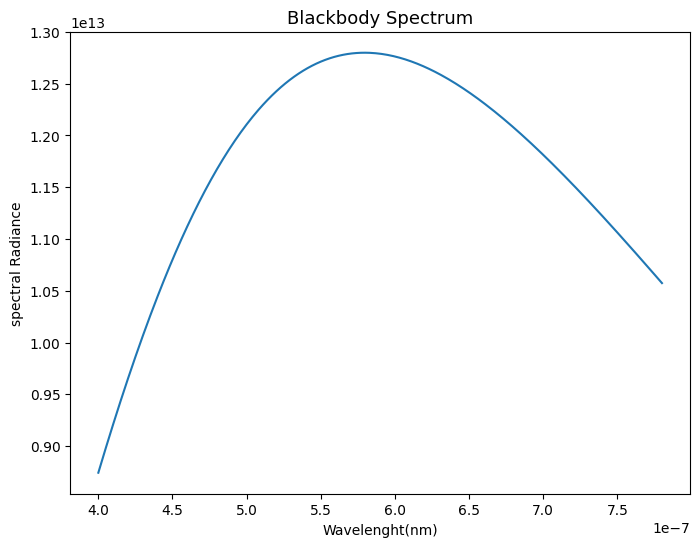

In [ ]:
plt.figure(figsize= (8,6))
plt.plot(wavelength, spectral_radiance)
plt.xlabel("Wavelenght(nm)", size= 10)
plt.ylabel("spectral Radiance", size=10)
plt.title("Blackbody Spectrum", size=13)
plt.show()

Step3: Build a python program to generate a probability distribution based on the blackbody spectral energy density and normalise the probability distribution and plot the graph between probability distribution and wavelength.

In [ ]:
# Which spectrum you want to choose-
# (1):- SDSS Spectrum
# (2):- Blackbody Spectrum?

In [ ]:
def program1():
    wavelength_range = np.linspace(min_wavelength, max_wavelength, max_wavelength - min_wavelength + 1)
    temperature = int(input("Enter the value of temperature: "))  # Temperature in Kelvin

    spectrum = blackbody_spectrum(wavelength_range, temperature)

    wavelength = np.array(list(spectrum.keys())) * 1e9  # Convert wavelengths back to nanometers
    spectral_radiance = np.array(list(spectrum.values()))

    return list(wavelength), list(spectral_radiance)

def program2():
    filename = 'spDR2-000.fit'  # Example filename
    hdul = fits.open(filename)
    HDU_0 = hdul[0]
    hdr = hdul[0].header
    coeff0 = hdr['COEFF0']
    coeff1 = hdr['COEFF1']
    spectral_radiance = HDU_0.data[0]
    length = len(spectral_radiance)
    indices = np.linspace(0, length - 1, length)
    wavelength = 10 ** (coeff0 + coeff1 * indices) / 10

    return list(wavelength), list(spectral_radiance)

def extract_wavelength_spectral_radiance(program_choice):
    if program_choice == 1:
        return program1()
    elif program_choice == 2:
        return program2()
    else:
        print("Invalid program choice")

# Example usage
program_choice = int(input("Enter the program choice (1 for Program 1, 2 for Program 2): "))
wavelength, spectral_radiance = extract_wavelength_spectral_radiance(program_choice)

print("Wavelength (nm):", wavelength)
print("Spectral Radiance:", spectral_radiance)
print("Length of the wavelength:-", len(wavelength))
print("Length of the spectral radiance:-", len(spectral_radiance))

Enter the program choice (1 for Program 1, 2 for Program 2): 1
Enter the value of temperature: 5000
Wavelength (nm): [400.00000000000006, 401.0, 402.0, 403.00000000000006, 404.0, 405.00000000000006, 406.0, 407.00000000000006, 408.0, 409.0, 410.00000000000006, 411.0, 412.00000000000006, 413.0, 414.0, 415.00000000000006, 416.0, 417.00000000000006, 418.0, 419.00000000000006, 420.0, 421.0, 422.00000000000006, 423.0, 424.00000000000006, 425.0, 426.00000000000006, 427.00000000000006, 428.0, 429.00000000000006, 430.0, 431.00000000000006, 432.0, 433.0, 434.00000000000006, 435.0, 436.00000000000006, 437.0, 438.00000000000006, 439.00000000000006, 440.0, 441.00000000000006, 442.0, 443.00000000000006, 444.0, 445.0, 446.00000000000006, 447.0, 448.00000000000006, 449.0, 450.00000000000006, 451.0, 452.0, 453.00000000000006, 454.0, 455.00000000000006, 456.0, 457.00000000000006, 458.00000000000006, 459.0, 460.00000000000006, 461.0, 462.00000000000006, 463.0, 464.0, 465.00000000000006, 466.0, 467.000000

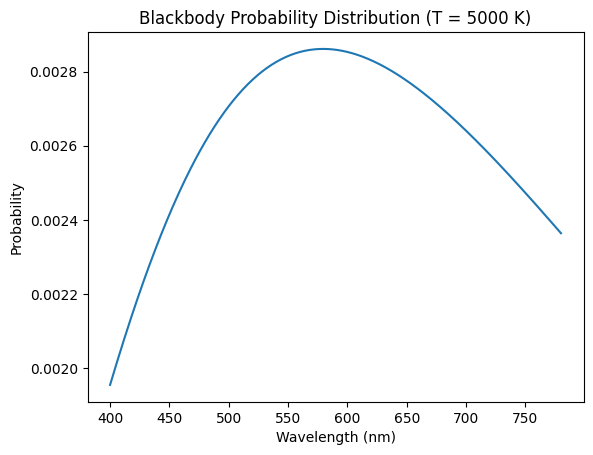

In [ ]:
def generate_probability_distribution(wavelength, temperature):

    # Sum the spectral radiance values
    total_radiance = np.sum(spectral_radiance)

    # Calculate the probability distribution by dividing by the total radiance
    probability_distribution = spectral_radiance / total_radiance

    return probability_distribution

def plot_probability_distribution(wavelength, temperature):
    probability_distribution = generate_probability_distribution(wavelength, temperature)

    # Plot the probability distribution
    plt.plot(wavelength, probability_distribution)
    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Probability')
    plt.title('Blackbody Probability Distribution (T = {} K)'.format(temperature))
    plt.show()

# Example usage
#wavelength = np.linspace(min_wavelength, max_wavelength, max_wavelength - min_wavelength+1)  # Wavelength range in nanometers
#temperature = 5000  # Temperature in Kelvin
plot_probability_distribution(wavelength, temperature)

Step4: Build a python program that can generate a finite number of photons using the probability_distribution.

In [ ]:
probabilities= generate_probability_distribution(wavelength, temperature)
print("Probabilities:-", probabilities[:5])
print("Wavelength:-", wavelength[:5])
print("Length of the wavelength:-", len(wavelength))

wave_prob = list(zip(wavelength, probabilities))
print("Wavelength:Probabilities", wave_prob[:5])

wavelength, probabilities = zip(*wave_prob)

Probabilities:- [0.00195463 0.00196535 0.00197601 0.00198662 0.00199717]
Wavelength:- [400.00000000000006, 401.0, 402.0, 403.00000000000006, 404.0]
Length of the wavelength:- 381
Wavelength:Probabilities [(400.00000000000006, 0.0019546288349696133), (401.0, 0.0019653481308025784), (402.0, 0.0019760116360836187), (403.00000000000006, 0.0019866188236598485), (404.0, 0.001997169178771248)]


In [ ]:
import random
import numpy as np

def generate_simulated_photons(spectrum, num_photons):
    simulated_photons = []

    wavelength, probabilities = zip(*wave_prob)
    cumulative_probabilities = np.cumsum(probabilities)

    for _ in range(num_photons):
        random_num = random.random()
        wavelength1 = wavelength[np.searchsorted(cumulative_probabilities, random_num)]
        energy = 1240 / wavelength1  # Convert wavelength to energy in eV
        simulated_photons.append((wavelength1, energy))

    return simulated_photons


def main():
    wave_prob= [(500, 0.3), (600, 0.5), (700, 0.2)]  # Example spectrum
    num_photons = 100

    simulated_photons = generate_simulated_photons(wave_prob, num_photons)
    print(simulated_photons)
    print("length of the simulated Photons:-", len(simulated_photons))


if __name__ == '__main__':
    main()

[(402.0, 3.084577114427861), (441.00000000000006, 2.8117913832199544), (719.0, 1.7246175243393602), (521.0000000000001, 2.3800383877159303), (421.0, 2.9453681710213777), (460.00000000000006, 2.695652173913043), (634.0000000000001, 1.95583596214511), (608.0, 2.039473684210526), (739.0, 1.6779431664411366), (696.0000000000001, 1.7816091954022986), (517.0, 2.3984526112185685), (534.0, 2.3220973782771535), (509.0, 2.43614931237721), (525.0, 2.361904761904762), (740.0, 1.6756756756756757), (736.0, 1.684782608695652), (580.0000000000001, 2.137931034482758), (760.0, 1.631578947368421), (638.0000000000001, 1.9435736677115985), (757.0, 1.6380449141347424), (424.00000000000006, 2.924528301886792), (691.0, 1.7945007235890014), (661.0, 1.8759455370650528), (427.00000000000006, 2.903981264637002), (457.00000000000006, 2.7133479212253824), (463.0, 2.678185745140389), (677.0, 1.8316100443131462), (594.0, 2.0875420875420874), (513.0, 2.4171539961013644), (428.0, 2.897196261682243), (687.0, 1.804949053

Step5: Build a program to count the generated photons in each wavelength bin.

In [ ]:
num_photons= 100
simulated_photons = generate_simulated_photons(wave_prob, num_photons)

print(simulated_photons)
print("Length of the simulated Photons:-", len(simulated_photons))
print("Length of the wavelength:-", len(wavelength))

#count for the number of photons in each wavelength bin
import collections
counter = collections.Counter(simulated_photons)
counter

[(612.0, 2.026143790849673), (607.0000000000001, 2.0428336079077427), (689.0000000000001, 1.7997097242380258), (417.00000000000006, 2.9736211031175057), (544.0, 2.2794117647058822), (586.0000000000001, 2.116040955631399), (573.0000000000001, 2.164048865619546), (519.0, 2.3892100192678227), (542.0000000000001, 2.287822878228782), (775.0000000000001, 1.5999999999999999), (488.00000000000006, 2.5409836065573765), (776.0000000000001, 1.5979381443298968), (452.0, 2.743362831858407), (766.0, 1.6187989556135771), (779.0000000000001, 1.5917843388960202), (567.0, 2.18694885361552), (677.0, 1.8316100443131462), (713.0, 1.7391304347826086), (517.0, 2.3984526112185685), (655.0000000000001, 1.893129770992366), (539.0, 2.300556586270872), (636.0, 1.949685534591195), (435.0, 2.8505747126436782), (486.0, 2.551440329218107), (545.0000000000001, 2.275229357798165), (709.0, 1.7489421720733427), (455.00000000000006, 2.725274725274725), (533.0, 2.326454033771107), (653.0, 1.898928024502297), (640.0, 1.9375

Counter({(612.0, 2.026143790849673): 1,
         (607.0000000000001, 2.0428336079077427): 2,
         (689.0000000000001, 1.7997097242380258): 1,
         (417.00000000000006, 2.9736211031175057): 2,
         (544.0, 2.2794117647058822): 1,
         (586.0000000000001, 2.116040955631399): 1,
         (573.0000000000001, 2.164048865619546): 1,
         (519.0, 2.3892100192678227): 1,
         (542.0000000000001, 2.287822878228782): 1,
         (775.0000000000001, 1.5999999999999999): 1,
         (488.00000000000006, 2.5409836065573765): 2,
         (776.0000000000001, 1.5979381443298968): 1,
         (452.0, 2.743362831858407): 2,
         (766.0, 1.6187989556135771): 1,
         (779.0000000000001, 1.5917843388960202): 1,
         (567.0, 2.18694885361552): 1,
         (677.0, 1.8316100443131462): 1,
         (713.0, 1.7391304347826086): 1,
         (517.0, 2.3984526112185685): 2,
         (655.0000000000001, 1.893129770992366): 1,
         (539.0, 2.300556586270872): 1,
         (636.

In [ ]:
print(len(counter))
print(len(wavelength))

85
381


After step5, the task is divided into 2 sections-
1) Different iterations- for every iteration, the user will enter the value of number of photons, wavelength start point and end point and for every iteration the value will not be the same.
2) Same iteration- we fixed the num_photons, wavelength start point and wavelength end point.

Section1: Different iterations

Step6(a)

In [ ]:
# (i)- Build a program to iterate the step5 for the number of iterations and num_photons as given by the user.

In [ ]:
import random
import numpy as np
import collections


def generate_simulated_photons(spectrum, num_photons):
    simulated_photons = []

    wavelength, probabilities = zip(*spectrum)
    cumulative_probabilities = np.cumsum(probabilities)

    for _ in range(num_photons):
        random_num = random.random()
        wavelength1 = wavelength[np.searchsorted(cumulative_probabilities, random_num)]
        energy = 1240 / wavelength1  # Convert wavelength to energy in eV
        simulated_photons.append((wavelength1, energy))

    return simulated_photons


def count_photons_by_wavelength(simulated_photons):
    photon_counts = collections.Counter([wavelength for wavelength, _ in simulated_photons])
    sorted_counts = sorted(photon_counts.items(), key=lambda x: x[0])  # Sort by wavelength
    return sorted_counts


def get_wavelength_range():
    while True:
        wavelength_start_point = int(input("Enter the start point of wavelength range: "))
        wavelength_end_point = int(input("Enter the end point of wavelength range: "))

        if wavelength_start_point < 400 or wavelength_end_point > 780 or wavelength_start_point >= wavelength_end_point:
            print("Invalid wavelength range! Please try again.")
        else:
            return wavelength_start_point, wavelength_end_point


def print_simulated_photons(simulated_photons):
    print(simulated_photons)
    print("Length:", len(simulated_photons))


def print_photon_counts(sorted_counts):
    print("Photon Counts:")
    for wavelength, count in sorted_counts:
        print("Wavelength:", wavelength, "- Count:", count)


def print_sorted_wavelengths(sorted_counts):
    sorted_wavelengths = [wavelength for wavelength, _ in sorted_counts]
    print("Sorted Wavelengths:", sorted_wavelengths)


def print_filtered_counts(filtered_counts, wavelength_start_point, wavelength_end_point):
    print(f"Photon Counts between {wavelength_start_point} and {wavelength_end_point}:")
    for wavelength, count in filtered_counts:
        print("Wavelength:", wavelength, "- Count:", count)

    count_sum = sum(count for wavelength, count in filtered_counts)
    print(f"Sum of counts between {wavelength_start_point} and {wavelength_end_point}: {count_sum}")


def simulate_photon_counts(spectrum, num_photons):
    simulated_photons = generate_simulated_photons(wave_prob, num_photons)
    print_simulated_photons(simulated_photons)

    photon_counts = count_photons_by_wavelength(simulated_photons)
    sorted_counts = sorted(photon_counts, key=lambda x: x[0])  # Sort by wavelength
    print_photon_counts(sorted_counts)

    print_sorted_wavelengths(sorted_counts)

    while True:
        wavelength_start_point, wavelength_end_point = get_wavelength_range()
        if wavelength_start_point < 400 or wavelength_end_point > 780 or wavelength_start_point >= wavelength_end_point:
            print("Invalid wavelength range! Please try again.")
        else:
            break

    filtered_counts = [(wavelength, count) for wavelength, count in sorted_counts if
                       wavelength_start_point <= wavelength <= wavelength_end_point]
    print_filtered_counts(filtered_counts, wavelength_start_point, wavelength_end_point)


def perform_simulation():
    spectrum = [(500, 0.3), (600, 0.5), (700, 0.2)]  # Example spectrum

    num_iterations = int(input("Enter the number of iterations: "))

    for i in range(1, num_iterations + 1):
        print(f"Iteration {i}:")
        num_photons = int(input("Enter the number of photons to generate: "))
        simulate_photon_counts(wave_prob, num_photons)
        print("\n")


if __name__ == '__main__':
    perform_simulation()
# I've split the code into functions: generate_simulated_photons, count_photons_by_wavelength, get_wavelength_range, print_simulated_photons, print_photon_counts, print_sorted_wavelengths, print_filtered_counts, and simulate_photon_counts.

Enter the number of iterations: 1
Iteration 1:
Enter the number of photons to generate: 121
[(505.00000000000006, 2.455445544554455), (656.0, 1.8902439024390243), (721.0000000000001, 1.7198335644937583), (571.0, 2.171628721541156), (667.0, 1.8590704647676162), (518.0000000000001, 2.3938223938223935), (656.0, 1.8902439024390243), (542.0000000000001, 2.287822878228782), (615.0, 2.016260162601626), (726.0, 1.7079889807162534), (760.0, 1.631578947368421), (465.00000000000006, 2.6666666666666665), (710.0000000000001, 1.7464788732394363), (604.0000000000001, 2.052980132450331), (699.0, 1.7739628040057225), (600.0000000000001, 2.0666666666666664), (632.0, 1.9620253164556962), (400.00000000000006, 3.0999999999999996), (495.0, 2.505050505050505), (740.0, 1.6756756756756757), (780.0, 1.5897435897435896), (639.0, 1.9405320813771518), (410.00000000000006, 3.0243902439024386), (753.0, 1.6467463479415672), (668.0, 1.8562874251497006), (610.0000000000001, 2.0327868852459012), (593.0000000000001, 2.09

In [ ]:
# (ii)- Generate plot of counts of simulated photons by wavelength

Enter the number of iterations: 1
Enter the number of photons to generate: 111
Iteration 1:
[(612.0, 2.026143790849673), (598.0, 2.0735785953177257), (629.0, 1.971383147853736), (625.0, 1.984), (583.0000000000001, 2.126929674099485), (576.0000000000001, 2.1527777777777772), (701.0, 1.768901569186876), (705.0, 1.7588652482269505), (586.0000000000001, 2.116040955631399), (533.0, 2.326454033771107), (513.0, 2.4171539961013644), (536.0, 2.3134328358208953), (635.0000000000001, 1.9527559055118107), (419.00000000000006, 2.959427207637231), (766.0, 1.6187989556135771), (503.0, 2.4652087475149105), (477.00000000000006, 2.5995807127882595), (556.0, 2.2302158273381294), (617.0000000000001, 2.009724473257698), (478.0, 2.594142259414226), (651.0, 1.9047619047619047), (514.0000000000001, 2.4124513618677037), (449.0, 2.7616926503340755), (568.0, 2.183098591549296), (470.00000000000006, 2.6382978723404253), (557.0, 2.2262118491921004), (771.0, 1.608300907911803), (541.0, 2.292051756007394), (556.0, 2

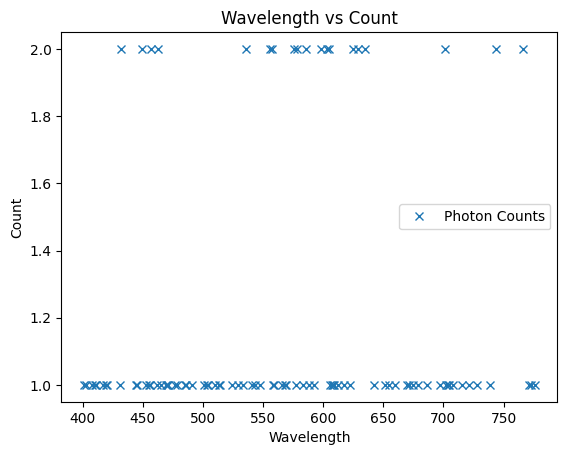



381


In [ ]:
import random
import numpy as np
import collections
import matplotlib.pyplot as plt


def generate_simulated_photons(spectrum, num_photons):
    simulated_photons = []

    wavelength, probabilities = zip(*spectrum)
    cumulative_probabilities = np.cumsum(probabilities)

    for _ in range(num_photons):
        random_num = random.random()
        wavelength1 = wavelength[np.searchsorted(cumulative_probabilities, random_num)]
        energy = 1240 / wavelength1  # Convert wavelength to energy in eV
        simulated_photons.append((wavelength1, energy))

    return simulated_photons


def count_photons_by_wavelength(simulated_photons):
    photon_counts = collections.Counter([wavelength for wavelength, _ in simulated_photons])
    sorted_counts = sorted(photon_counts.items(), key=lambda x: x[0])  # Sort by wavelength
    return sorted_counts


def get_user_input():
    num_iterations = int(input("Enter the number of iterations: "))
    num_photons = int(input("Enter the number of photons to generate: "))
    return num_iterations, num_photons


def print_simulated_photons(simulated_photons):
    print(simulated_photons)
    print("Length:", len(simulated_photons))


def print_photon_counts(sorted_counts):
    print("Photon Counts:")
    for wavelength, count in sorted_counts:
        print("Wavelength:", wavelength, "- Count:", count)


def plot_photon_counts(sorted_counts):
    sorted_wavelengths = [wavelength for wavelength, _ in sorted_counts]
    sorted_counts_values = [count for _, count in sorted_counts]

    plt.plot(sorted_wavelengths, sorted_counts_values, 'x', label="Photon Counts")

    plt.xlabel("Wavelength")
    plt.ylabel("Count")
    plt.title("Wavelength vs Count")
    plt.legend()

    plt.show()


def simulate_photon_counts(spectrum, num_photons):
    simulated_photons = generate_simulated_photons(wave_prob, num_photons)
    print_simulated_photons(simulated_photons)

    photon_counts = count_photons_by_wavelength(simulated_photons)
    sorted_counts = sorted(photon_counts, key=lambda x: x[0])  # Sort by wavelength
    print_photon_counts(sorted_counts)

    plot_photon_counts(sorted_counts)


def main():
    spectrum = [(500, 0.3), (600, 0.5), (700, 0.2)]  # Example spectrum

    num_iterations, num_photons = get_user_input()

    for i in range(1, num_iterations + 1):
        print(f"Iteration {i}:")
        simulate_photon_counts(wave_prob, num_photons)
        print("\n")


if __name__ == '__main__':
    main()
print(len(wavelength))

In [ ]:
# (iii)- Define a expectation value as expectation_value= Probability_distribution * num_photons

In [ ]:
num_photons= int(input("Enter the number of photons:- "))
Expectation_value= probabilities * num_photons
print((Expectation_value))

print(len(wavelength))

Enter the number of photons:- 100
(0.0019546288349696133, 0.0019653481308025784, 0.0019760116360836187, 0.0019866188236598485, 0.001997169178771248, 0.0020076621989722084, 0.00201809739405117, 0.002028474285948451, 0.0020387924086723566, 0.00204905130821362, 0.0020592505424582366, 0.002069389681098809, 0.0020794683055444076, 0.0020894860088290614, 0.0020994423955189244, 0.00210933708161819, 0.0021191696944737972, 0.0021289398726790348, 0.0021386472659760494, 0.002148291535157348, 0.0021578723519663557, 0.0021673893989970776, 0.002176842369592901, 0.0021862309677446443, 0.002195554907987854, 0.002204813915299399, 0.0022140077249934893, 0.0022231360826170644, 0.002232198743844677, 0.002241195474372889, 0.002250126049814205, 0.0022589902555906582, 0.002267787886827004, 0.002276518748243627, 0.0022851826540491943, 0.0022937794278330473, 0.0023023089024574593, 0.0023107709199497025, 0.0023191653313940344, 0.0023274919968236086, 0.0023357507851123364, 0.0023439415738667653, 0.002352064249317

In [ ]:
#(iv)- plot a graph between expectation_value vs wavelength

Enter the number of photons: 1


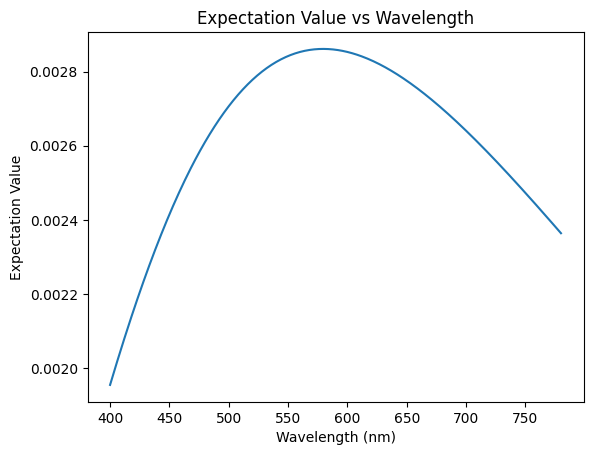

In [ ]:
def generate_expectation_value(wavelength, temperature, num_photons):
    probability_distribution = generate_probability_distribution(wavelength, temperature)
    expectation_value = probability_distribution * num_photons
    return expectation_value

def plot_expectation_value(wavelength, temperature, num_photons):
    expectation_value = generate_expectation_value(wavelength, temperature, num_photons)

    # Plot the expectation value
    plt.plot(wavelength, expectation_value)
    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Expectation Value')
    plt.title('Expectation Value vs Wavelength')
    plt.show()

# Example usage
wavelength = np.linspace(min_wavelength, max_wavelength, max_wavelength - min_wavelength+1)  # Wavelength range in nanometers
temperature = 5000  # Temperature in Kelvin
num_photons = int(input("Enter the number of photons: "))
plot_expectation_value(wavelength, temperature, num_photons)

In [ ]:
#(v)- plot the two above graph on the same graph where expectation_value and count should be on the y_axis and wavelength on the x_axis.

Enter the number of iterations: 1
Enter the number of photons to generate: 4555
Iteration 1:
[(588.0, 2.108843537414966), (747.0, 1.6599732262382865), (590.0000000000001, 2.101694915254237), (741.0000000000001, 1.6734143049932522), (442.0, 2.8054298642533935), (612.0, 2.026143790849673), (712.0, 1.7415730337078652), (400.00000000000006, 3.0999999999999996), (560.0, 2.2142857142857144), (443.00000000000006, 2.7990970654627536), (576.0000000000001, 2.1527777777777772), (409.0, 3.031784841075795), (655.0000000000001, 1.893129770992366), (637.0, 1.946624803767661), (438.00000000000006, 2.831050228310502), (522.0, 2.375478927203065), (772.0000000000001, 1.6062176165803106), (425.0, 2.9176470588235293), (469.00000000000006, 2.643923240938166), (598.0, 2.0735785953177257), (510.0, 2.4313725490196076), (542.0000000000001, 2.287822878228782), (412.00000000000006, 3.009708737864077), (617.0000000000001, 2.009724473257698), (675.0, 1.837037037037037), (544.0, 2.2794117647058822), (682.0, 1.818181

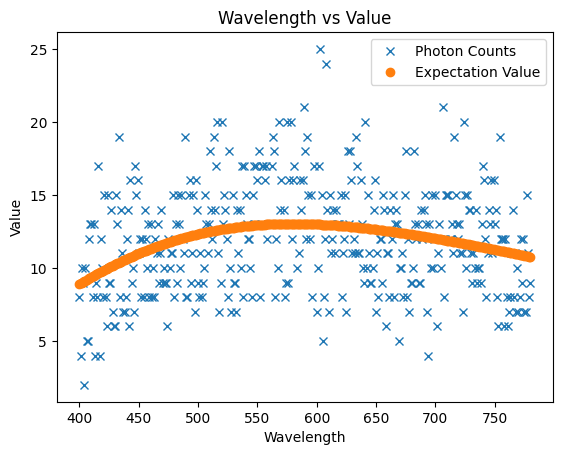

In [ ]:
import random
import numpy as np
import collections
import matplotlib.pyplot as plt


def generate_simulated_photons(spectrum, num_photons):
    simulated_photons = []

    wavelength, probabilities = zip(*spectrum)
    cumulative_probabilities = np.cumsum(probabilities)

    for _ in range(num_photons):
        random_num = random.random()
        wavelength1 = wavelength[np.searchsorted(cumulative_probabilities, random_num)]
        energy = 1240 / wavelength1  # Convert wavelength to energy in eV
        simulated_photons.append((wavelength1, energy))

    return simulated_photons


def count_photons_by_wavelength(simulated_photons):
    photon_counts = collections.Counter([wavelength for wavelength, _ in simulated_photons])
    sorted_counts = sorted(photon_counts.items(), key=lambda x: x[0])  # Sort by wavelength
    return sorted_counts


def generate_expectation_value(wavelengths, temperature, num_photons):
    probability_distribution = generate_probability_distribution(wavelengths, temperature)
    expectation_values = probability_distribution * num_photons
    return expectation_values


def get_user_input():
    num_iterations = int(input("Enter the number of iterations: "))
    num_photons = int(input("Enter the number of photons to generate: "))
    return num_iterations, num_photons


def print_simulated_photons(simulated_photons):
    print(simulated_photons)
    print("Length:", len(simulated_photons))


def print_photon_counts(sorted_counts):
    print("Photon Counts:")
    for wavelength, count in sorted_counts:
        print("Wavelength:", wavelength, "- Count:", count)


def plot_photon_counts(sorted_counts, expectation_values):
    sorted_wavelengths = [wavelength for wavelength, _ in sorted_counts]
    sorted_counts_values = [count for _, count in sorted_counts]

    plt.plot(sorted_wavelengths, sorted_counts_values, 'x', label="Photon Counts")
    plt.plot(sorted_wavelengths, expectation_values, 'o', label="Expectation Value", linewidth=0.1)  # Set line width

    plt.xlabel("Wavelength")
    plt.ylabel("Value")
    plt.title("Wavelength vs Value")
    plt.legend()

    plt.show()


def simulate_photon_counts(spectrum, num_photons):
    simulated_photons = generate_simulated_photons(wave_prob, num_photons)
    print_simulated_photons(simulated_photons)

    photon_counts = count_photons_by_wavelength(simulated_photons)
    sorted_counts = sorted(photon_counts, key=lambda x: x[0])  # Sort by wavelength
    print_photon_counts(sorted_counts)

    sorted_wavelengths = [wavelength for wavelength, _ in sorted_counts]
    expectation_values = generate_expectation_value(sorted_wavelengths, temperature, num_photons)

    plot_photon_counts(sorted_counts, expectation_values)


def perform_simulation(spectrum):
    num_iterations, num_photons = get_user_input()

    for i in range(1, num_iterations + 1):
        print(f"Iteration {i}:")
        simulate_photon_counts(wave_prob, num_photons)
        print("\n")


if __name__ == '__main__':
    spectrum = [(500, 0.3), (600, 0.5), (700, 0.2)]  # Example spectrum
    perform_simulation(spectrum)

In [ ]:
#(vi)- Find the residuals against the wavelength by using distance formula.

Enter the number of iterations: 1
Enter the number of photons to generate: 5566
Iteration 1:
[(653.0, 1.898928024502297), (464.0, 2.6724137931034484), (731.0000000000001, 1.6963064295485633), (555.0000000000001, 2.2342342342342336), (748.0000000000001, 1.657754010695187), (717.0000000000001, 1.729428172942817), (748.0000000000001, 1.657754010695187), (560.0, 2.2142857142857144), (526.0, 2.3574144486692017), (747.0, 1.6599732262382865), (648.0000000000001, 1.9135802469135799), (756.0, 1.6402116402116402), (736.0, 1.684782608695652), (425.0, 2.9176470588235293), (518.0000000000001, 2.3938223938223935), (502.0, 2.4701195219123506), (685.0, 1.8102189781021898), (754.0, 1.6445623342175066), (495.0, 2.505050505050505), (572.0, 2.167832167832168), (424.00000000000006, 2.924528301886792), (419.00000000000006, 2.959427207637231), (722.0, 1.7174515235457064), (699.0, 1.7739628040057225), (626.0, 1.9808306709265175), (410.00000000000006, 3.0243902439024386), (530.0, 2.339622641509434), (741.00000

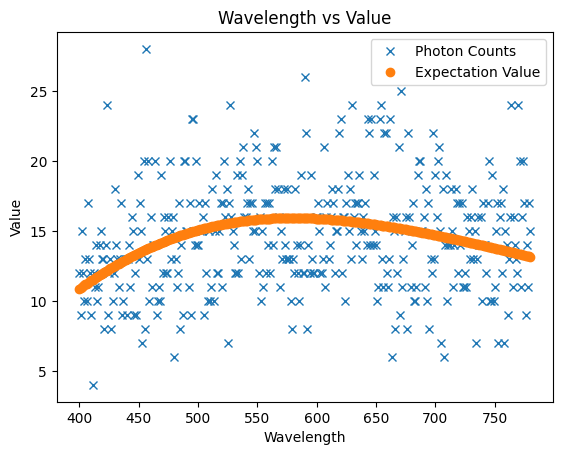

Residuals:
Wavelength: 400.00000000000006 - Residual: 1.1205359045591319
Wavelength: 401.0 - Residual: 1.9391276960471515
Wavelength: 402.0 - Residual: 4.001519233558579
Wavelength: 403.00000000000006 - Residual: 0.9424796275092824
Wavelength: 404.0 - Residual: 1.116243649040765
Wavelength: 405.00000000000006 - Residual: 1.8253522005206886
Wavelength: 406.0 - Residual: 1.2327300952888134
Wavelength: 407.00000000000006 - Residual: 5.709512124410923
Wavelength: 408.0 - Residual: 1.6520814533296626
Wavelength: 409.0 - Residual: 0.5949804184829901
Wavelength: 410.00000000000006 - Residual: 2.4617885193225444
Wavelength: 411.0 - Residual: 7.518222964995971
Wavelength: 412.00000000000006 - Residual: 0.4256794113398268
Wavelength: 413.0 - Residual: 0.6300791251425562
Wavelength: 414.0 - Residual: 2.3145036265416667
Wavelength: 415.00000000000006 - Residual: 1.7405701962868445
Wavelength: 416.0 - Residual: 0.7952985194411557
Wavelength: 417.00000000000006 - Residual: 2.150320668668492
Waveleng

In [ ]:
import random
import numpy as np
import collections
import matplotlib.pyplot as plt


def generate_simulated_photons(spectrum, num_photons):
    simulated_photons = []

    wavelength, probabilities = zip(*spectrum)
    cumulative_probabilities = np.cumsum(probabilities)

    for _ in range(num_photons):
        random_num = random.random()
        wavelength1 = wavelength[np.searchsorted(cumulative_probabilities, random_num)]
        energy = 1240 / wavelength1  # Convert wavelength to energy in eV
        simulated_photons.append((wavelength1, energy))

    return simulated_photons


def count_photons_by_wavelength(simulated_photons):
    photon_counts = collections.Counter([wavelength for wavelength, _ in simulated_photons])
    sorted_counts = sorted(photon_counts.items(), key=lambda x: x[0])  # Sort by wavelength
    return sorted_counts


def generate_expectation_value(wavelengths, temperature, num_photons):
    probability_distribution = generate_probability_distribution(wavelengths, temperature)
    expectation_values = probability_distribution * num_photons
    return expectation_values


def calculate_residuals(wavelengths, count_values, expectation_values):
    residuals = [abs(count - expectation) for count, expectation in zip(count_values, expectation_values)]
    return residuals


def get_user_input():
    num_iterations = int(input("Enter the number of iterations: "))
    num_photons = int(input("Enter the number of photons to generate: "))
    return num_iterations, num_photons


def print_simulated_photons(simulated_photons):
    print(simulated_photons)
    print("Length:", len(simulated_photons))


def print_photon_counts(sorted_counts):
    print("Photon Counts:")
    for wavelength, count in sorted_counts:
        print("Wavelength:", wavelength, "- Count:", count)


def plot_photon_counts(sorted_counts, expectation_values):
    sorted_wavelengths = [wavelength for wavelength, _ in sorted_counts]
    sorted_counts_values = [count for _, count in sorted_counts]

    plt.plot(sorted_wavelengths, sorted_counts_values, 'x', label="Photon Counts")
    plt.plot(sorted_wavelengths, expectation_values, 'o', label="Expectation Value", linewidth=2.0)  # Set line width

    plt.xlabel("Wavelength")
    plt.ylabel("Value")
    plt.title("Wavelength vs Value")
    plt.legend()

    plt.show()


def print_residuals(sorted_wavelengths, residuals):
    print("Residuals:")
    for wavelength, residual in zip(sorted_wavelengths, residuals):
        print("Wavelength:", wavelength, "- Residual:", residual)


def simulate_photon_counts(spectrum, num_photons):
    simulated_photons = generate_simulated_photons(wave_prob, num_photons)
    print_simulated_photons(simulated_photons)

    photon_counts = count_photons_by_wavelength(simulated_photons)
    sorted_counts = sorted(photon_counts, key=lambda x: x[0])  # Sort by wavelength
    print_photon_counts(sorted_counts)

    sorted_wavelengths = [wavelength for wavelength, _ in sorted_counts]
    expectation_values = generate_expectation_value(sorted_wavelengths, temperature, num_photons)

    plot_photon_counts(sorted_counts, expectation_values)

    # Calculate residuals
    # residuals = calculate_residuals(sorted_wavelengths, [count for _, count in sorted_counts], expectation_values)
    residuals = calculate_residuals(sorted_wavelengths, [count for _, count in sorted_counts], expectation_values)
    print_residuals(sorted_wavelengths, residuals)


def main():
    spectrum = [(500, 0.3), (600, 0.5), (700, 0.2)]  # Example spectrum

    num_iterations, num_photons = get_user_input()

    for i in range(1, num_iterations + 1):
        print(f"Iteration {i}:")
        simulate_photon_counts(wave_prob, num_photons)
        print("\n")


if __name__ == '__main__':
    main()

In [ ]:
#(vii)- Plot a graph between residuals and wavelength

Enter the number of iterations: 1
Enter the number of photons to generate: 5566
Iteration 1:
[(529.0, 2.344045368620038), (531.0000000000001, 2.3352165725047076), (677.0, 1.8316100443131462), (640.0, 1.9375), (739.0, 1.6779431664411366), (555.0000000000001, 2.2342342342342336), (670.0, 1.8507462686567164), (678.0, 1.8289085545722714), (770.0, 1.6103896103896105), (674.0, 1.8397626112759644), (726.0, 1.7079889807162534), (741.0000000000001, 1.6734143049932522), (645.0000000000001, 1.9224806201550384), (653.0, 1.898928024502297), (585.0, 2.1196581196581197), (426.00000000000006, 2.9107981220657275), (484.00000000000006, 2.56198347107438), (592.0, 2.0945945945945947), (674.0, 1.8397626112759644), (408.0, 3.0392156862745097), (711.0, 1.7440225035161745), (667.0, 1.8590704647676162), (628.0000000000001, 1.9745222929936301), (501.00000000000006, 2.4750499001996005), (478.0, 2.594142259414226), (778.0, 1.5938303341902313), (743.0, 1.6689098250336474), (657.0, 1.887366818873668), (780.0, 1.589

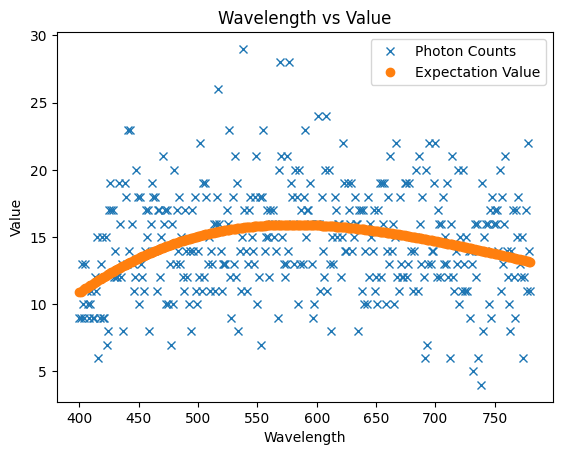

Residuals:
Wavelength: 400.00000000000006 - Residual: 1.8794640954408681
Wavelength: 401.0 - Residual: 1.9391276960471515
Wavelength: 402.0 - Residual: 2.0015192335585787
Wavelength: 403.00000000000006 - Residual: 1.0575203724907176
Wavelength: 404.0 - Residual: 2.116243649040765
Wavelength: 405.00000000000006 - Residual: 1.8253522005206886
Wavelength: 406.0 - Residual: 0.2327300952888134
Wavelength: 407.00000000000006 - Residual: 1.2904878755890774
Wavelength: 408.0 - Residual: 2.3479185466703374
Wavelength: 409.0 - Residual: 1.40501958151701
Wavelength: 410.00000000000006 - Residual: 0.4617885193225444
Wavelength: 411.0 - Residual: 2.518222964995971
Wavelength: 412.00000000000006 - Residual: 2.574320588660173
Wavelength: 413.0 - Residual: 0.36992087485744385
Wavelength: 414.0 - Residual: 0.6854963734583333
Wavelength: 415.00000000000006 - Residual: 3.2594298037131555
Wavelength: 416.0 - Residual: 5.795298519441156
Wavelength: 417.00000000000006 - Residual: 2.849679331331508
Wavelengt

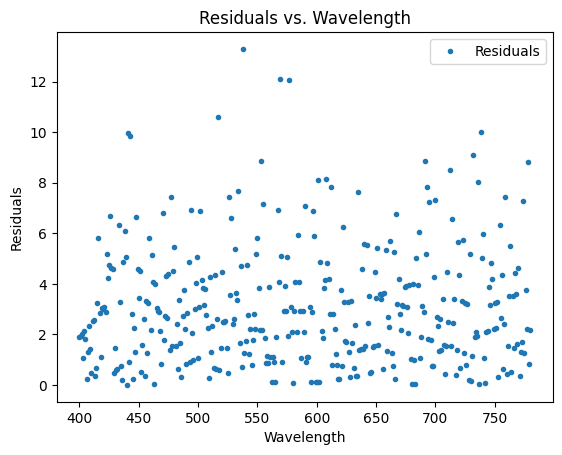

In [ ]:
import random
import numpy as np
import collections
import matplotlib.pyplot as plt


def generate_simulated_photons(spectrum, num_photons):
    simulated_photons = []

    wavelength, probabilities = zip(*spectrum)
    cumulative_probabilities = np.cumsum(probabilities)

    for _ in range(num_photons):
        random_num = random.random()
        wavelength1 = wavelength[np.searchsorted(cumulative_probabilities, random_num)]
        energy = 1240 / wavelength1  # Convert wavelength to energy in eV
        simulated_photons.append((wavelength1, energy))

    return simulated_photons


def count_photons_by_wavelength(simulated_photons):
    photon_counts = collections.Counter([wavelength for wavelength, _ in simulated_photons])
    sorted_counts = sorted(photon_counts.items(), key=lambda x: x[0])  # Sort by wavelength
    return sorted_counts


def generate_expectation_value(wavelengths, temperature, num_photons):
    probability_distribution = generate_probability_distribution(wavelengths, temperature)
    expectation_values = probability_distribution * num_photons
    return expectation_values


def calculate_residuals(wavelengths, count_values, expectation_values):
    residuals = [abs(count - expectation) for count, expectation in zip(count_values, expectation_values)]
    return residuals


def get_user_input():
    num_iterations = int(input("Enter the number of iterations: "))
    num_photons = int(input("Enter the number of photons to generate: "))
    return num_iterations, num_photons


def print_simulated_photons(simulated_photons):
    print(simulated_photons)
    print("Length:", len(simulated_photons))


def print_photon_counts(sorted_counts):
    print("Photon Counts:")
    for wavelength, count in sorted_counts:
        print("Wavelength:", wavelength, "- Count:", count)


def plot_photon_counts(sorted_counts, expectation_values):
    sorted_wavelengths = [wavelength for wavelength, _ in sorted_counts]
    sorted_counts_values = [count for _, count in sorted_counts]

    plt.plot(sorted_wavelengths, sorted_counts_values, 'x', label="Photon Counts")
    plt.plot(sorted_wavelengths, expectation_values, 'o', label="Expectation Value", linewidth=2.0)  # Set line width

    plt.xlabel("Wavelength")
    plt.ylabel("Value")
    plt.title("Wavelength vs Value")
    plt.legend()

    plt.show()


def print_residuals(sorted_wavelengths, residuals):
    print("Residuals:")
    for wavelength, residual in zip(sorted_wavelengths, residuals):
        print("Wavelength:", wavelength, "- Residual:", residual)


def plot_residuals(wavelengths, residuals):
    plt.plot(wavelengths, residuals, '.', label="Residuals")

    plt.xlabel("Wavelength")
    plt.ylabel("Residuals")
    plt.title("Residuals vs. Wavelength")
    plt.legend()

    plt.show()


def simulate_photon_counts(spectrum, num_photons):
    simulated_photons = generate_simulated_photons(wave_prob, num_photons)
    print_simulated_photons(simulated_photons)

    photon_counts = count_photons_by_wavelength(simulated_photons)
    sorted_counts = sorted(photon_counts, key=lambda x: x[0])  # Sort by wavelength
    print_photon_counts(sorted_counts)

    sorted_wavelengths = [wavelength for wavelength, _ in sorted_counts]
    sorted_counts_values = [count for _, count in sorted_counts]

    # Generate expectation values
    expectation_values = generate_expectation_value(sorted_wavelengths, temperature, num_photons)

    plot_photon_counts(sorted_counts, expectation_values)

    # Calculate residuals
    residuals = calculate_residuals(sorted_wavelengths, sorted_counts_values, expectation_values)
    print_residuals(sorted_wavelengths, residuals)

    # Plot residuals vs wavelength
    plot_residuals(sorted_wavelengths, residuals)


def main():
    spectrum = [(500, 0.3), (600, 0.5), (700, 0.2)]  # Example spectrum

    num_iterations, num_photons = get_user_input()

    for i in range(1, num_iterations + 1):
        print(f"Iteration {i}:")
        simulate_photon_counts(wave_prob, num_photons)
        print("\n")


if __name__ == '__main__':
    main()

Section2- Same Iterations

Step6(b)

In [ ]:
# Please note that term indicate here that it is for the same iteration.
# In the same iterations everything is same like photon counts, wavelength filter etc. but only it is varying due to process iterates again and again.

In [ ]:
# (i)- Create a program for many iterations where num_photons and wavelength_filter will remain the same which should be defined in the beginning.
#- Comment out the print statement of photon counts for the with wavelength filter and without wavelength filter.
#- Return list of "Sum" of counts

In [ ]:
import random
import numpy as np
import collections


def generate_simulated_photons(spectrum, num_photons):
    simulated_photons = []

    wavelengths, probabilities = zip(*spectrum)
    cumulative_probabilities = np.cumsum(probabilities)

    for _ in range(num_photons):
        random_num = random.random()
        wavelength1 = wavelengths[np.searchsorted(cumulative_probabilities, random_num)]
        energy = 1240 / wavelength1  # Convert wavelength to energy in eV
        simulated_photons.append((wavelength1, energy))

    return simulated_photons


def count_photons_by_wavelength(simulated_photons):
    photon_counts = collections.Counter([wavelength for wavelength, _ in simulated_photons])
    sorted_counts = sorted(photon_counts.items(), key=lambda x: x[0])  # Sort by wavelength
    return sorted_counts


def get_user_input():
    num_photons = int(input("Enter the number of photons to generate: "))
    wavelength_start_point = int(input("Enter the start point of wavelength range: "))
    wavelength_end_point = int(input("Enter the end point of wavelength range: "))
    num_iterations = int(input("Enter the number of iterations: "))
    temperature = int(input("Enter the temperature: "))

    return num_photons, wavelength_start_point, wavelength_end_point, num_iterations, temperature


def print_simulated_photons(simulated_photons):
    print(simulated_photons)
    print("Length:", len(simulated_photons))


# def print_photon_counts(sorted_counts):
    #print("Photon Counts:")
    #for wavelength, count in sorted_counts:
     #   print("Wavelength:", wavelength, "- Count:", count)


def print_sorted_wavelengths(sorted_counts):
    sorted_wavelengths = [wavelength for wavelength, _ in sorted_counts]
    print("Sorted Wavelengths:", sorted_wavelengths)


def print_filtered_counts(filtered_counts, wavelength_start_point, wavelength_end_point):
    #print(f"Photon Counts between {wavelength_start_point} and {wavelength_end_point}:")
    #for wavelength, count in filtered_counts:
     # print("Wavelength:", wavelength, "- Count:", count)


    count_sum = sum(count for wavelength, count in filtered_counts)
    #print(f"Sum of counts between {wavelength_start_point} and {wavelength_end_point}: {count_sum}")
    return count_sum


def simulate_photon_counts(wave_prob, num_photons, wavelength_start_point, wavelength_end_point):
    simulated_photons = generate_simulated_photons(wave_prob, num_photons)
    #print_simulated_photons(simulated_photons)

    photon_counts = count_photons_by_wavelength(simulated_photons)
    sorted_counts = sorted(photon_counts, key=lambda x: x[0])  # Sort by wavelength
    #print_photon_counts(sorted_counts)

    #print_sorted_wavelengths(sorted_counts)

    filtered_counts = [(wavelength, count) for wavelength, count in sorted_counts if
                       wavelength_start_point <= wavelength <= wavelength_end_point]
    return print_filtered_counts(filtered_counts, wavelength_start_point, wavelength_end_point)


def perform_simulation():
    SOC= []
    num_photons, wavelength_start_point, wavelength_end_point, num_iterations, temperature = get_user_input()
    spectrum = [(500, 0.3), (600, 0.5), (700, 0.2)]  # Example spectrum
    sum_of_counts_list = []

    for i in range(1, num_iterations + 1):
        #print(f"Iteration {i}:")
        sum_of_counts = simulate_photon_counts(wave_prob, num_photons, wavelength_start_point, wavelength_end_point)
        sum_of_counts_list.append(sum_of_counts)
        #print("\n")

    print("Sum of Counts for Each Iteration:")
    for iteration, count in enumerate(sum_of_counts_list, start=1):
        SOC.append(count)
    print(SOC)
    print("length of the SOC is:-", len(SOC))


if __name__ == '__main__':
    perform_simulation()

Enter the number of photons to generate: 100
Enter the start point of wavelength range: 423
Enter the end point of wavelength range: 623
Enter the number of iterations: 109
Enter the temperature: 5000
Sum of Counts for Each Iteration:
[51, 53, 43, 57, 51, 62, 49, 60, 50, 54, 59, 58, 56, 51, 55, 50, 51, 58, 52, 56, 55, 49, 50, 49, 60, 55, 51, 64, 64, 57, 58, 56, 48, 56, 55, 51, 52, 52, 54, 44, 59, 49, 57, 59, 63, 56, 49, 53, 48, 52, 49, 51, 50, 52, 48, 55, 58, 51, 48, 57, 58, 53, 62, 53, 59, 55, 58, 55, 52, 48, 43, 48, 53, 57, 54, 48, 57, 52, 54, 57, 58, 52, 48, 56, 64, 53, 50, 52, 51, 56, 50, 51, 63, 51, 50, 49, 59, 57, 60, 59, 50, 50, 50, 63, 50, 55, 56, 47, 53]
length of the SOC is:- 109


In [ ]:
# (ii)-: Plot the distribution(histogram) for the sum values

Enter the number of photons to generate: 100
Enter the start point of wavelength range: 423
Enter the end point of wavelength range: 623
Enter the number of iterations: 10000
Enter the temperature: 5000


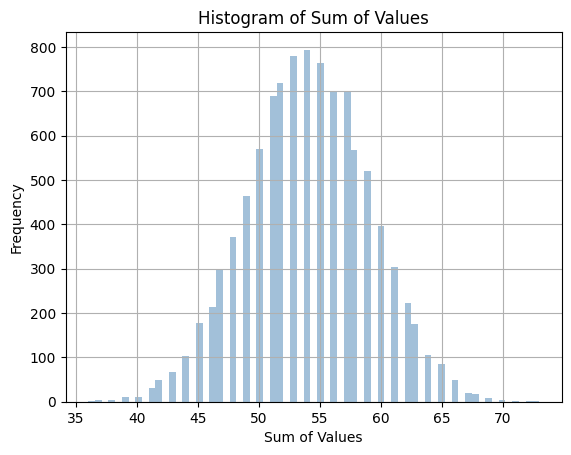

In [ ]:
import random
import numpy as np
import collections
import matplotlib.pyplot as plt

# Rest of the code...

def plot_histogram(sum_of_counts_list):
    sum_of_values = sum_of_counts_list

    plt.hist(sum_of_values, bins='auto', color='steelblue', alpha=0.5)
    plt.xlabel('Sum of Values')
    plt.ylabel('Frequency')
    plt.title('Histogram of Sum of Values')
    plt.grid(True)
    plt.show()


def perform_simulation():
    num_photons, wavelength_start_point, wavelength_end_point, num_iterations, temperature = get_user_input()
    spectrum = [(500, 0.3), (600, 0.5), (700, 0.2)]  # Example spectrum
    sum_of_counts_list = []

    for i in range(1, num_iterations + 1):
        #print(f"Iteration {i}:")
        sum_of_counts = simulate_photon_counts(wave_prob, num_photons, wavelength_start_point, wavelength_end_point)
        sum_of_counts_list.append(sum_of_counts)
        #print("\n")

    #print("Sum of Counts for Each Iteration:")
    #for iteration, counts in enumerate(sum_of_counts_list, start=1):
    #    print(f"Iteration {iteration}: {counts}")
    #print("Length of the sum_of_counts_list is:", len(sum_of_counts_list))

    plot_histogram(sum_of_counts_list)


if __name__ == '__main__':
    perform_simulation()

In [ ]:
# (iii):- Calculate descriptive statistics(e.g. mean, median, standard deviation, max, min, interquartile and variance)

In [ ]:
import random
import numpy as np
import collections
import matplotlib.pyplot as plt


def calculate_descriptive_statistics(sum_of_counts_list):
    mean = np.mean(sum_of_counts_list)
    mode = collections.Counter(sum_of_counts_list).most_common(1)[0][0]
    median = np.median(sum_of_counts_list)
    std_dev = np.std(sum_of_counts_list)
    maximum = np.max(sum_of_counts_list)
    minimum = np.min(sum_of_counts_list)
    q75, q25 = np.percentile(sum_of_counts_list, [75, 25])
    iqr = q75 - q25
    variance = np.var(sum_of_counts_list)

    print("Descriptive Statistics:")
    print("Mean:", mean)
    print("Mode:", mode)
    print("Median:", median)
    print("Standard Deviation:", std_dev)
    print("Variance:", variance)
    print("Maximum:", maximum)
    print("Minimum:", minimum)
    print("Interquartile Range:", iqr)


def plot_histogram(sum_of_counts_list):
    sum_of_values = sum_of_counts_list

    n, bins, patches = plt.hist(sum_of_values, bins='auto', color='steelblue', alpha=0.7)
    bin_centers = 0.5 * (bins[1:] + bins[:-1])
    bin_heights, _ = np.histogram(sum_of_values, bins='auto')

    coefficients = np.polyfit(bin_centers, bin_heights, deg=3)
    polynomial = np.poly1d(coefficients)
    curve_x = np.linspace(min(bin_centers), max(bin_centers), 100)
    curve_y = polynomial(curve_x)

    # plt.plot(curve_x, curve_y, '-r')

    plt.xlabel('Sum of Values')
    plt.ylabel('Frequency')
    plt.title('Histogram of Sum of Values')
    plt.grid(True)
    plt.show()


def perform_simulation():
    num_photons, wavelength_start_point, wavelength_end_point, num_iterations, temperature = get_user_input()
    spectrum = [(500, 0.3), (600, 0.5), (700, 0.2)]  # Example spectrum
    sum_of_counts_list = []

    for i in range(1, num_iterations + 1):
        sum_of_counts = simulate_photon_counts(wave_prob, num_photons, wavelength_start_point, wavelength_end_point)
        sum_of_counts_list.append(sum_of_counts)

    calculate_descriptive_statistics(sum_of_counts_list)
    plot_histogram(sum_of_counts_list)


if __name__ == '__main__':
    perform_simulation()